In [1]:
import torch
import numpy as np

torch.__version__

'1.0.1.post2'

In [2]:
from torchvision import datasets
import torchvision.transforms as transforms

batch = 16

transform = transforms.ToTensor()

train_data = datasets.MNIST(root = 'data', train= True, download = True, transform = transform)
test_data = datasets.MNIST(root = 'data', train= False, download = True, transform = transform)

train_loader = torch.utils.data.DataLoader(train_data, batch_size = batch)
test_loader = torch.utils.data.DataLoader(test_data, batch_size = batch)

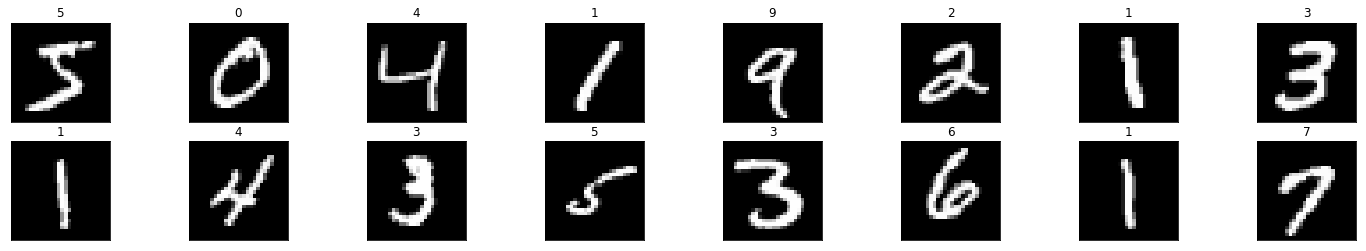

In [3]:
import matplotlib.pyplot as plt 
%matplotlib inline

dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy()

fig = plt.figure(figsize = (25, 4))
for idx in np.arange(16):
    ax = fig.add_subplot(2, 16/2, idx + 1, xticks = [], yticks = [])
    ax.imshow(np.squeeze(images[idx]), cmap = 'gray')
    ax.set_title(str(labels[idx].item()))

In [4]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super (Net, self).__init__()
        hidden_1 = 32
        hidden_2 = 32
        self.fc1 = nn.Linear(784, hidden_1)          #fcl is a fully connected layer
        self.fc2 = nn.Linear(hidden_1, hidden_2)
        self.fc3 = nn.Linear(hidden_2, 10)           #10 is so it does a softmax at last
        
    def forward(self, x):
        x = x.view(-1, 784)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
model = Net()
print(model)

Net(
  (fc1): Linear(in_features=784, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=10, bias=True)
)


In [5]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001)           #Using Stochastic Gradient Decent 

In [ ]:
n_epochs = 10
model.train()

for epoch in range(n_epochs):
    train_loss = 0.0
    
    for data, target in train_loader:
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * data.size(0)
        
        print('Epoch: ', epoch, train_loss/len(train_loader.dataset))

Epoch:  0 0.0006255860646565755
Epoch:  0 0.0012367048263549805
Epoch:  0 0.001851149559020996
Epoch:  0 0.0024493664423624675
Epoch:  0 0.0030774885177612303
Epoch:  0 0.0036800380706787108
Epoch:  0 0.004307772382100423
Epoch:  0 0.00492652759552002
Epoch:  0 0.005545742416381836
Epoch:  0 0.0061583782196044925
Epoch:  0 0.006769360987345378
Epoch:  0 0.007392867851257324
Epoch:  0 0.008012665112813315
Epoch:  0 0.008635309410095215
Epoch:  0 0.00925507074991862
Epoch:  0 0.00987553621927897
Epoch:  0 0.010495539156595866
Epoch:  0 0.011112317593892416
Epoch:  0 0.011721373748779297
Epoch:  0 0.012343935839335124
Epoch:  0 0.01296063969930013
Epoch:  0 0.01357163054148356
Epoch:  0 0.014188527870178222
Epoch:  0 0.014802419471740722
Epoch:  0 0.015425003623962402
Epoch:  0 0.016046044794718425
Epoch:  0 0.016654453722635906
Epoch:  0 0.017271960004170736
Epoch:  0 0.01789107074737549
Epoch:  0 0.018517595227559407
Epoch:  0 0.019135353787740072
Epoch:  0 0.019767195002237954
Epoch:  

In [ ]:
# Testing 